
#First Vanilla Network 


In [1]:
#loading libraries
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#loading libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


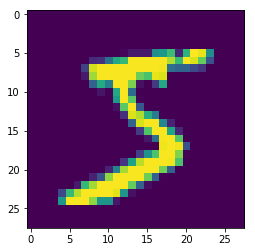

In [4]:
#plotting random image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#resizing the images to 28x28x1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#normalizing  the pixles
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [15]:
from keras.layers import Activation,BatchNormalization
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26  #3
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24   #5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22   #7
model.add(BatchNormalization())

model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) # 22
model.add(MaxPooling2D(pool_size=(2, 2))) # 11     ## 14

model.add(Convolution2D(8, 3, 3, activation='relu')) # 9   #16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu')) # 7 #18
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu')) # 5 #20
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 5)) # 1x10

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 32)        4640      
__________

In [0]:
#setting loss function and optimizers , compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [18]:
#fitting the model over train set and also checking the accuracy simultanously
model.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=64, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.2529 - acc: 0.9198 - val_loss: 0.0562 - val_acc: 0.9829
Epoch 2/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0674 - acc: 0.9794 - val_loss: 0.0457 - val_acc: 0.9848
Epoch 3/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.0520 - acc: 0.9841 - val_loss: 0.0300 - val_acc: 0.9911
Epoch 4/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0450 - acc: 0.9857 - val_loss: 0.0312 - val_acc: 0.9894
Epoch 5/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0392 - acc: 0.9876 - val_loss: 0.0337 - val_acc: 0.9895
Epoch 6/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0353 - acc: 0.9890 - val_loss: 0.0296 - val_acc: 0.9907
Epoch 7/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0311 - acc: 0.9896 - val_loss: 0.

In [94]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02944346641272232, 0.9909]
